# Beispiel 9.4: Reversible,exotherme Reaktion im polytropen CSTR
Bearbeitet von Amke Wiesner

Dieses Beispiel befindet sich im Lehrbuch auf den Seiten 123 - 126. Die Nummerierung der verwendeten Gleichungen entspricht der Nummerierung im Lehrbuch. Der hier abgebildete Lösungsweg entspricht dem im Lehrbuch.

# Code

Zunächst werden die benötigten Pakete importiert. Anschließend werden die gegebenen Werte in Variablen gespeichert.

In diesem Beispiel wird die Funktion *fsolve* aus dem Paket *scipy* verwendet. Mit ihr werden Nullstellen einer Funktion bestimmt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve    # Nullstellen einer Funktion

In [2]:
DRH_ref = -75.3e3      # J/mol       Reaktionsenthalpie bei Referenztemp.
DRG_ref = -14.13e3     # J/mol       freie Reaktionsenthalpie bei Referenztemp.
DT_ad   = 200          # K           adiabatische Temperaturdifferenz
T_a     = 25 + 273     # K           effektive Kühltemperatur
T_ref   = 298          # K           Referenztemperatur
R       = 8.314        # J/(mol K)   universelle Gaskonstante
c_1e    = 1000         # mol/m³

# tau = 100            # s           mittlere Verweilzeit
k0_forward = 34e6 /60  # 1/s         Frequenzfaktor Hinreaktion
Ea_forward = 48.9e3    # J/mol       Aktivierungsenergie Hinreaktion

# St = 1.5             # -           Stanton-Zahl

In [3]:
T = np.linspace(0 + 273, 200 + 273, 101)   # K Temperaturbereich

## Berechnung des Umsatzgrades

Es wird der Verlauf des Umsatzgrades in Abhängigkeit von der Temperatur berechnet. Zunächst wird der Umsatzgrad im Gleichgewicht nach Glg. (9.17) als Funktion definiert. 

In [4]:
def U_eq(T):                              # Glg. (9.17)
    return K(T) / (K(T) + 1)

Die Gleichgewichtskonstante *K(T)* kann aus dem Verhältnis $K(T)/K(T_{ref})$ berechnet werden. Folgende Gleichung wird dafür verwendet:

\begin{equation*}
K(T) = K(T_\text{ref}) \cdot exp \bigg[ \frac{- \Delta_RH^\ominus_\text{ref}}{R} \cdot \bigg(\frac{1}{T} - \frac{1}{T_\text{ref}} \bigg) \bigg]
\end{equation*}

Weitere Informationen zur Herleitung der Formel finden sich im Beispiel 9.4 im Lehrbuch.

In [5]:
def K(T):
    return K_ref * np.exp(- DRH_ref/R * (1/T - 1/T_ref))

Die Gleichgewichtskonstante bei Referenztemperatur nimmt einen konstanten Wert an, der nach Glg. (4.12) berechnet wird.

In [6]:
K_ref = np.exp(-DRG_ref / (R * T_ref))    # Glg. (4.12)
print('K_ref =', round(K_ref, 4))

K_ref = 299.8146


Im nächsten Schritt werden die Geschwindigkeitskonstanten der Hin- und der Rückreaktion als Funktionen angelegt. Dazu wird zur Berechnung der Geschwindigkeitskonstante für die Hinreaktion *k_forward* der Arrhenius-Ansatz nach Glg. (5.7) verwendet:

\begin{equation*}
k_+ = k_{0,+} \cdot exp \bigg( \frac{- E_\text{A}}{R \cdot T} \bigg)
\end{equation*}

Die Geschwindigkeitskonstante für die Rückreaktion *k_backward* wird mit Hilfe der Glg. (9.16c) berechnet:

\begin{equation*}
k_{-} = \frac{k_+}{K(T)}
\end{equation*}

In [7]:
def k_forward(T):
    return k0_forward * np.exp(- Ea_forward / (R * T))

def k_backward(T):
    return k_forward(T) / K(T)

Nun werden die Funktionen für den Umsatzgrad angelegt. Die Funktion *U_tau* stellt den Umsatzgrad in Abhängigkeit von der Temperatur und der mittleren Verweilzeit dar. Die Herleitung der verwendeten Gleichung ist im Beispiel 9.4 des Lehrbuchs zu finden.

\begin{equation*}
U(T, \overline{\tau}) = \frac{\overline{\tau} \space k_+}{1 + \overline{\tau} \space k_+ + \overline{\tau} \space k_-}
\end{equation*}

Die Funktion *U_r* bildet den Umsatzgrad in Abhängigkeit von der Temperatur für verschiedene Reaktionskinetiken ab. Auch für diese Gleichung ist eine detaillierte Herleitung in Beispiel 9.4 des Lehrbuchs zu finden. In dieser Rechnung wird Glg. (9.31) verwendet:

\begin{equation*}
U(T, r) = \frac{k_+ \space c_\text{1,e} - r}{c_\text{1,e} \space (k_+ + k_-)}      \tag{9.31}
\end{equation*}

In [8]:
def U_tau(T, tau):
    return (tau * k_forward(T))/(1 + tau * k_forward(T) + tau * k_backward(T))

In [9]:
def U_r(T, r):           # Glg. (9.31)
    return (k_forward(T) * c_1e - r)/(c_1e * (k_forward(T) + k_backward(T)))

## Berechnen der Wärmeströme

An dieser Stelle werden die dimensionslosen Wärmeströme als Funktionen angelegt.

Aus Betrachtung der Glg. (9.24) ergibt sich unter Zuhilfenahme der Glg. (9.26) und (9.27b) der folgender Zusammenhang für die freiwerdende Wärme durch die Reaktion:
\begin{equation*}
T_\text{e} \dot{Q}'_ \text{R} = \Delta T_\text{ad,+} \cdot U 
\end{equation*}

Diese Gleichung lässt sich für den freiwerdenden Wärmestrom im Gleichgewicht anwenden:
\begin{equation*}
T_\text{e} \dot{Q}'_ \text{eq} = \Delta T_\text{ad,+} \cdot U_\text{eq}
\end{equation*}

In [10]:
def Q_R(T, tau):
    return DT_ad * U_tau(T, tau)

def Q_eq(T):
    return DT_ad * U_eq(T)

Auf Basis der Glg. (9.28) kann folgender Ausdruck für den abgeführten Wärmestrom formuliert werden:
\begin{equation*}
T_\text{e} \dot{Q}'_ \text{ab} = (1 + St) \space (T - T_\text{A})
\end{equation*}

In [11]:
def Q_ab(T, St):
    return (1 + St) * (T - T_a)

## Bestimmung des Betriebspunktes

Ein Betriebspunkt des Reaktors wird als ein Schnittpunkt von Wärmeerzeugungskurve und Wärmeabfuhrgerade sichtbar. Er wird berechnet, indem innerhalb der Funktion *Intersect(T)* die Differenz zwischen beiden Kurven gebildet wird. Mit dem Befehl *fsolve* aus dem Paket *scipy* wird die Nullstelle der Funktion *Intersect(T)* bestimmt. In eckigen Klammern wird dabei der Startwert für diese Operation angegeben. 

In [12]:
def Intersect(T):
    return Q_R(T, 100) - Q_ab(T, 1.5)

T_Betr = fsolve(Intersect, [50])
print('Betriebstemperatur: ', round(T_Betr[0]-273, 2) , '°C')

Q_Betr = Q_R(T_Betr,100)
print('dimensionsloser Wärmestrom, Te Q: ', round(Q_Betr[0], 2), 'K')

Betriebstemperatur:  73.47 °C
dimensionsloser Wärmestrom, Te Q:  121.19 K


Um den Umsatzgrad am Betriebspunkt zu bestimmen, wird die Betriebstemperatur in die Umsatzgradfunktion *U_tau* mit der gegebenen mittleren Verweilzeit von $\overline{\tau}$ = 100 s eingesetzt. 

In [13]:
U_Betr = U_tau(T_Betr, 100)[0]
print('Umsatzgrad =', round(U_Betr * 100, 2) , '%')

Umsatzgrad = 60.59 %


Abschließend wird die Reaktionsgeschwindigkeit $r$ nach Glg. (9.30) bestimmt.

In [14]:
r = k_forward(T_Betr) * c_1e * (1 - U_Betr) - k_backward(T_Betr) * c_1e * U_Betr
print('Reaktionsgeschwindigkeit r =', round(r[0], 3), 'mol/(m³ s)')

Reaktionsgeschwindigkeit r = 6.059 mol/(m³ s)


## Grafische Darstellung 

In die Umsatzgrad-Funktionen (*U_tau* und *U_r*) werden für die mittlere Verweilzeit und die Reaktionsgeschwindigkeit jeweils fünf verschiedene Werte eingesetzt.
Die Werte für die mittlere Verweilzeit werden auch in der Funktion zur Berechnung des freiwerdenden Wärmestroms $T_\text{e} \dot{Q}'_ \text{ab}$ (*Q_ab*) eingesetzt. Die Wärmeabfuhrgerade wird für vier verschiedene Stanton-Zahlen abgebildet.


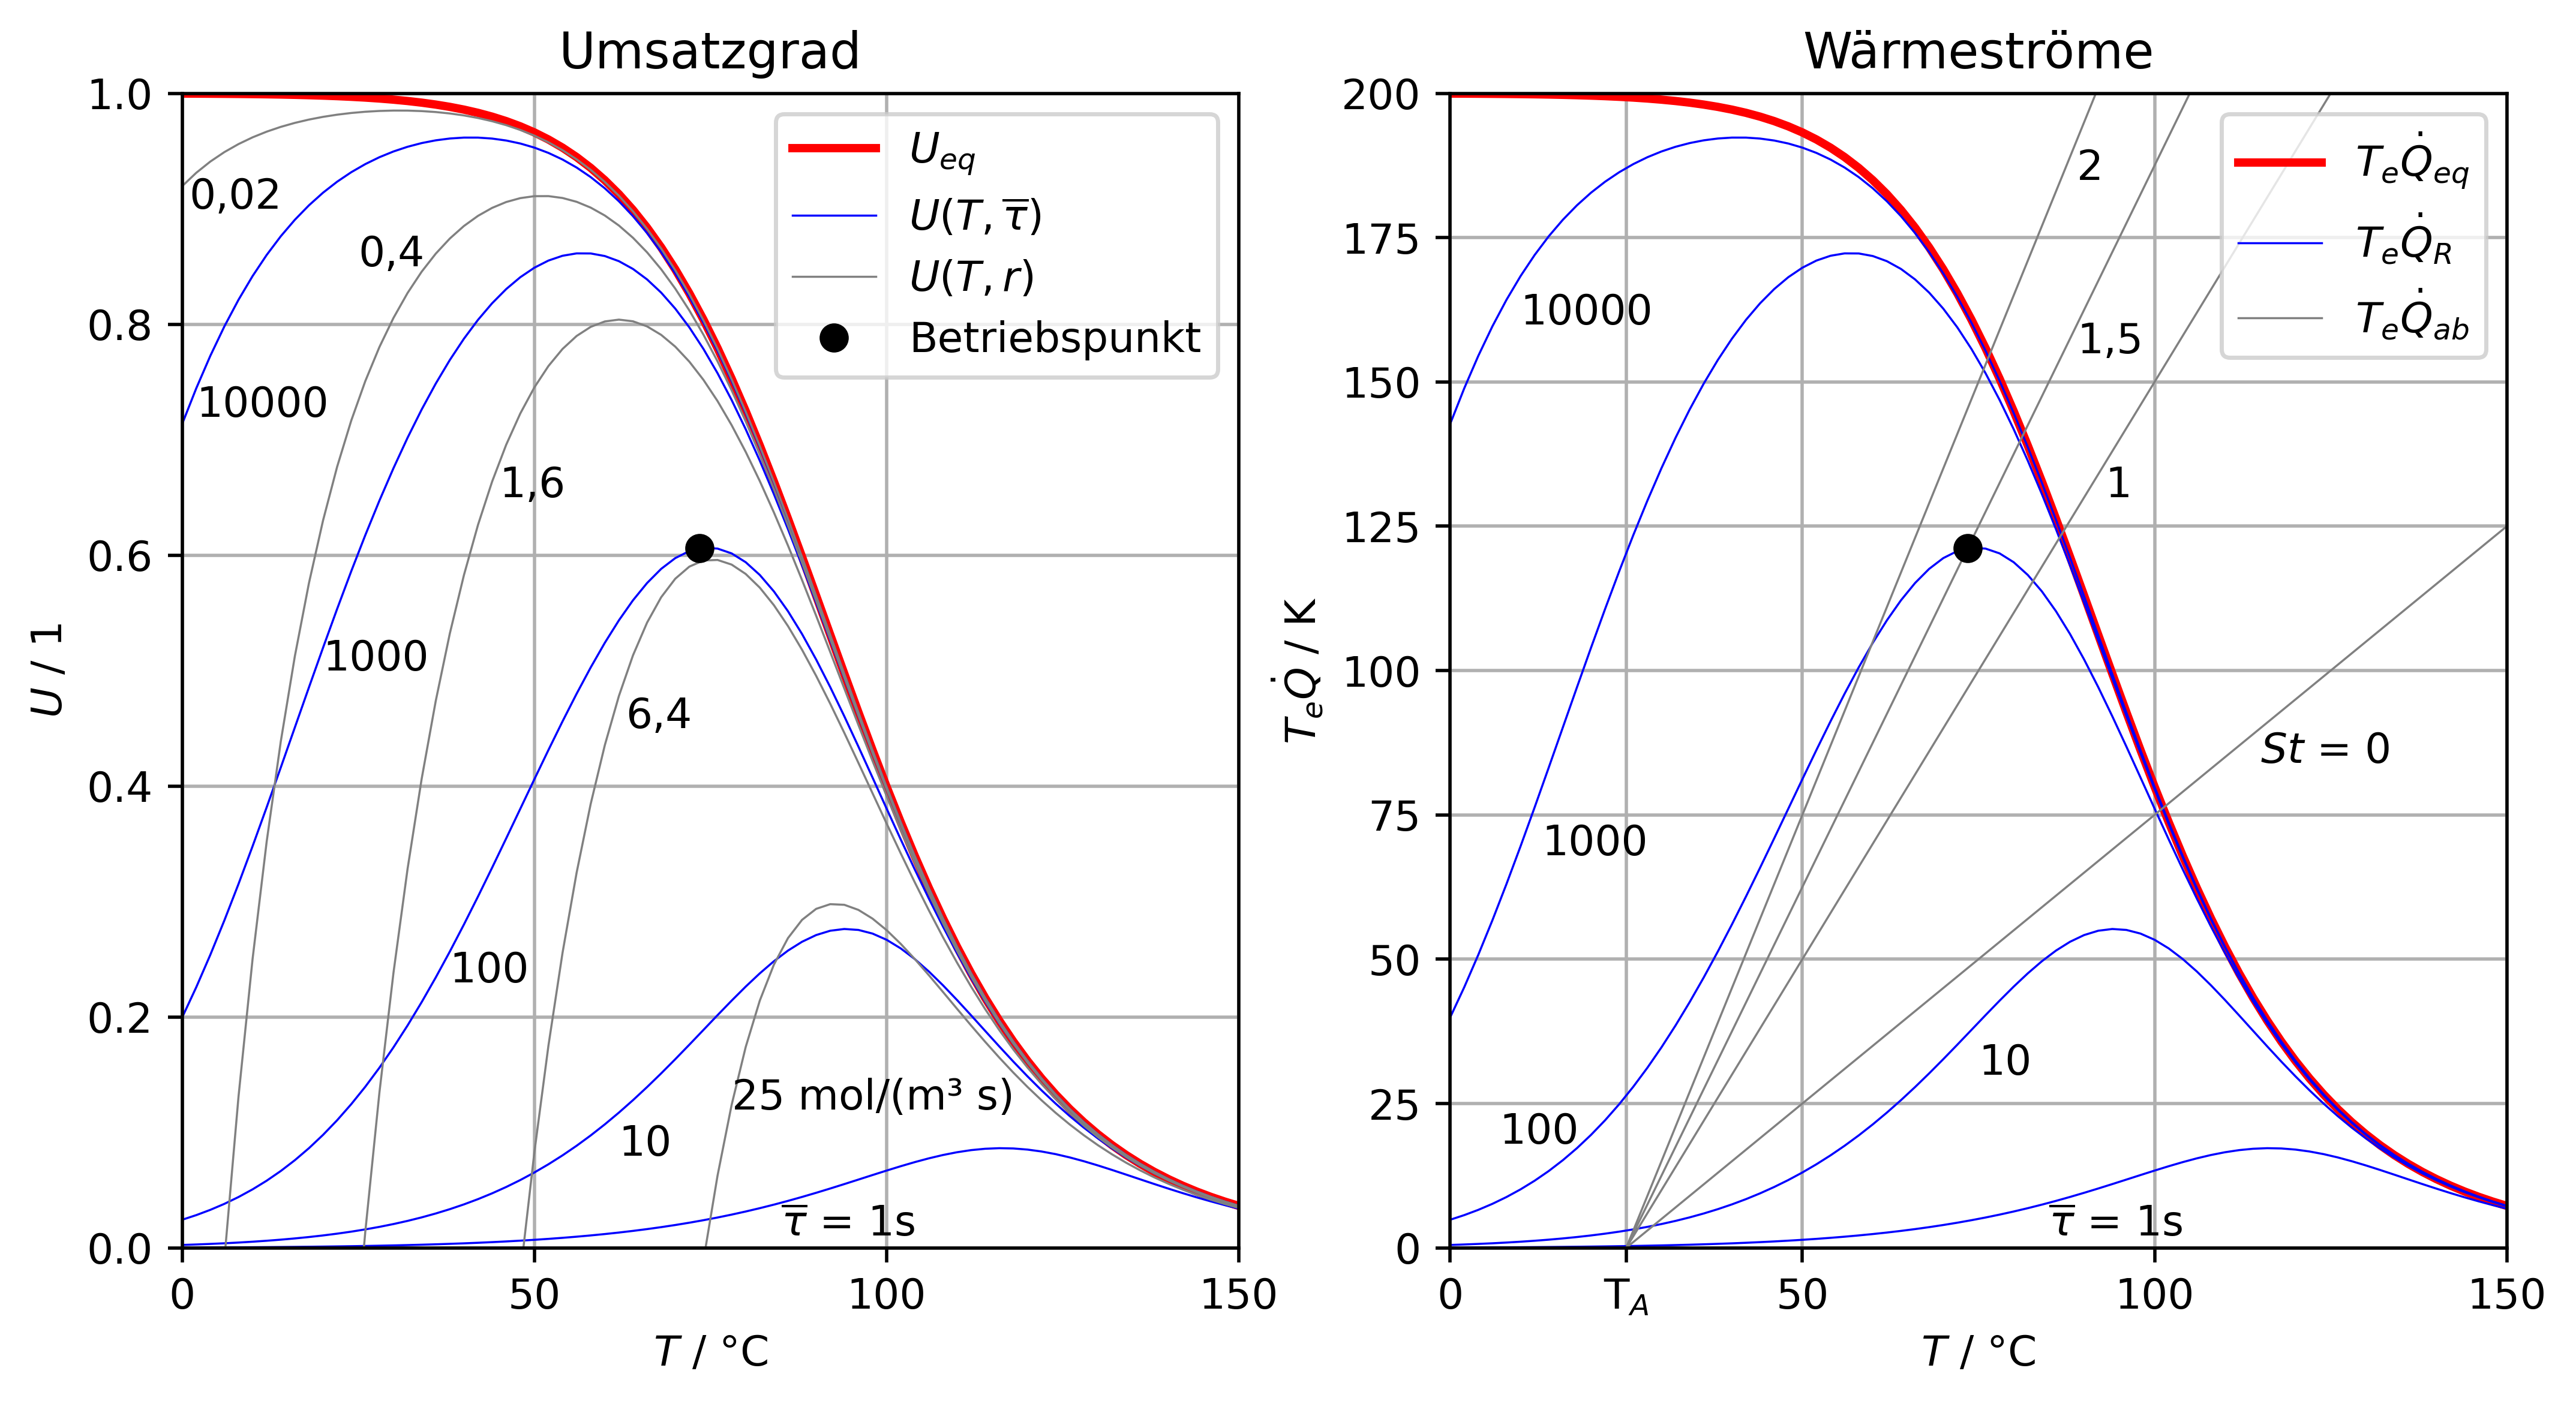

In [15]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,5), dpi = 500)

# Grafik Umsatzgrad als Funktion der Temperatur
ax1.set_title('Umsatzgrad')

ax1.set_xlabel('$T$ / °C')
ax1.set_ylabel('$U$ / 1')

ax1.set_xlim(0,150)
ax1.set_ylim(0,1)

ax1.set_xticks([0,50,100,150], minor = False)
ax1.grid(True)

# Umsatzgrad im Gleichgewicht, Glg. (9.17)
ax1.plot(T-273, U_eq(T), color = 'red', linewidth = 2, label = '$U_{eq}$')

# Einfluss Verweilzeit auf Umsatzgrad, U_tau
ax1.plot(T-273, U_tau(T, 1), color = 'blue', linewidth = 0.5)
ax1.text(85, 0.01, '$\overline{\\tau}$ = 1s')
ax1.plot(T-273, U_tau(T, 10), color = 'blue', linewidth = 0.5)
ax1.text(62, 0.08, '10')
ax1.plot(T-273, U_tau(T, 100), color = 'blue', linewidth = 0.5)
ax1.text(38, 0.23, '100')
ax1.plot(T-273, U_tau(T, 1000), color = 'blue', linewidth = 0.5)
ax1.text(20, 0.5, '1000')
ax1.plot(T-273, U_tau(T, 10000), color = 'blue', linewidth = 0.5, label = '$U (T, \overline{\\tau})$')
ax1.text(2, 0.72, '10000')

# Einfluss Reaktionsgeschwindigkeit auf Umsatzgrad, U_r
ax1.plot(T-273, U_r(T, 0.02), color = 'grey', linewidth = 0.5)
ax1.text(1, 0.9, '0,02')
ax1.plot(T-273, U_r(T, 0.4), color = 'grey', linewidth = 0.5)
ax1.text(25, 0.85, '0,4')
ax1.plot(T-273, U_r(T, 1.6), color = 'grey', linewidth = 0.5)
ax1.text(45, 0.65, '1,6')
ax1.plot(T-273, U_r(T, 6.4), color = 'grey', linewidth = 0.5)
ax1.text(63, 0.45, '6,4')
ax1.plot(T-273, U_r(T, 25 ), color = 'grey', linewidth = 0.5, label = '$U (T, r)$')
ax1.text(78, 0.12, '25 mol/(m³ s)')

# Betriebspunkt
ax1.plot(T_Betr-273, U_tau(T_Betr, 100), 'o', color = 'black', label = 'Betriebspunkt')

# Legende
ax1.legend(loc = 'upper right')




# Grafik Wärmeströme als Funktion der Temperatur
ax2.set_title('Wärmeströme')

ax2.set_xlabel('$T$ / °C')
ax2.set_ylabel('$T_e \dot{Q}$ / K')

ax2.set_xlim(0,150)
ax2.set_ylim(0,200)

ax2.set_xticks([0,T_a-273, 50,100,150], ['0', 'T$_A$', '50', '100', '150'], minor = False)
ax2.grid(True)

# Wärmeströme im Gleichgewicht, Q_eq
ax2.plot(T-273, Q_eq(T), color = 'red', linewidth = 2, label = '$T_e \dot{Q}_{eq}$')

# Einfluss Verweilzeit auf freiwerdenden Wärmestrom, Q_R
ax2.plot(T-273, Q_R(T, 1), color = 'blue', linewidth = 0.5)
ax2.text(85, 2, '$\overline{\\tau}$ = 1s')
ax2.plot(T-273, Q_R(T, 10), color = 'blue', linewidth = 0.5)
ax2.text(75, 30, '10')
ax2.plot(T-273, Q_R(T, 100), color = 'blue', linewidth = 0.5)
ax2.text(7, 18, '100')
ax2.plot(T-273, Q_R(T, 1000), color = 'blue', linewidth = 0.5)
ax2.text(13, 68, '1000')
ax2.plot(T-273, Q_R(T, 10000), color = 'blue', linewidth = 0.5, label = '$T_e \dot{Q}_R$')
ax2.text(10, 160, '10000')

# Einfluss Stanton-Zahlen auf abgeführten Wärmestrom, Q_ab
ax2.plot(T-273, Q_ab(T, 0), color = 'grey', linewidth = 0.5)
ax2.text(115, 84, '$St$ = 0')
ax2.plot(T-273, Q_ab(T, 1), color = 'grey', linewidth = 0.5)
ax2.text(93, 130, '1')
ax2.plot(T-273, Q_ab(T, 1.5), color = 'grey', linewidth = 0.5)
ax2.text(89, 155, '1,5')
ax2.plot(T-273, Q_ab(T, 2), color = 'grey', linewidth = 0.5, label = '$T_e \dot{Q}_{ab}$')
ax2.text(89, 185, '2')

# Betriebspunkt
ax2.plot(T_Betr-273, Q_Betr, 'o', color = 'black')

# Legende
ax2.legend(loc = 'upper right')



plt.show()